<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.231337,57.546755,-1343.049253,-1226.271161,969.099605,-2195.370765
1,0.0,1.0,44.635421,98.309901,1116.992919,1269.938242,2911.270738,-1641.332497
2,0.0,2.0,72.942335,65.497649,-5458.064868,-5309.624883,-176.445443,-5133.179440
3,0.0,3.0,21.852261,32.047894,-1105.604740,-1041.704585,1628.356607,-2670.061192
4,0.0,4.0,80.441727,20.507905,-541.981194,-431.031563,-2470.336729,2039.305167
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.968354,26.194768,-110.131701,-2.968579,-82.267825,79.299245
29996,999.0,26.0,75.449714,80.472893,994.473477,1160.396085,1280.535872,-120.139787
29997,999.0,27.0,87.208572,86.863456,5616.931710,5801.003738,1197.658925,4603.344813
29998,999.0,28.0,46.720435,81.500631,11674.139503,11812.360570,1930.611446,9881.749123


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.231337,57.546755,-1343.049253,-1226.271161,969.099605,-2195.370765
1,0.0,1.0,44.635421,98.309901,1116.992919,1269.938242,2911.270738,-1641.332497
2,0.0,2.0,72.942335,65.497649,-5458.064868,-5309.624883,-176.445443,-5133.179440
3,0.0,3.0,21.852261,32.047894,-1105.604740,-1041.704585,1628.356607,-2670.061192
4,0.0,4.0,80.441727,20.507905,-541.981194,-431.031563,-2470.336729,2039.305167
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.968354,26.194768,-110.131701,-2.968579,-82.267825,79.299245
29996,999.0,26.0,75.449714,80.472893,994.473477,1160.396085,1280.535872,-120.139787
29997,999.0,27.0,87.208572,86.863456,5616.931710,5801.003738,1197.658925,4603.344813
29998,999.0,28.0,46.720435,81.500631,11674.139503,11812.360570,1930.611446,9881.749123


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    49.231337  57.546755  -1343.049253  -1226.271161   969.099605   
      1.0    44.635421  98.309901   1116.992919   1269.938242  2911.270738   
      2.0    72.942335  65.497649  -5458.064868  -5309.624883  -176.445443   
      3.0    21.852261  32.047894  -1105.604740  -1041.704585  1628.356607   
      4.0    80.441727  20.507905   -541.981194   -431.031563 -2470.336729   
...                ...        ...           ...           ...          ...   
999.0 25.0   70.968354  26.194768   -110.131701     -2.968579   -82.267825   
      26.0   75.449714  80.472893    994.473477   1160.396085  1280.535872   
      27.0   87.208572  86.863456   5616.931710   5801.003738  1197.658925   
      28.0   46.720435  81.500631  11674.139503  11812.360570  1930.611446   
      29.0   20.229406  94.099130   3203.258010   3327.586546  2843.407915   

                   e_hat  
rep   index               
0.0   0.0   -2195.370765  
      1.0   -1641.332497  
      2.0   -5133.179440  
      3.0   -2670.061192  
      4.0    2039.305167  
...                  ...  
999.0 25.0     79.299245  
      26.0   -120.139787  
      27.0   4603.344813  
      28.0   9881.749123  
      29.0    484.178632  

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    49.231337  57.546755  -1343.049253  -1226.271161   969.099605   
      1.0    44.635421  98.309901   1116.992919   1269.938242  2911.270738   
      2.0    72.942335  65.497649  -5458.064868  -5309.624883  -176.445443   
      3.0    21.852261  32.047894  -1105.604740  -1041.704585  1628.356607   
      4.0    80.441727  20.507905   -541.981194   -431.031563 -2470.336729   
...                ...        ...           ...           ...          ...   
999.0 25.0   70.968354  26.194768   -110.131701     -2.968579   -82.267825   
      26.0   75.449714  80.472893    994.473477   1160.396085  1280.535872   
      27.0   87.208572  86.863456   5616.931710   5801.003738  1197.658925   
      28.0   46.720435  81.500631  11674.139503  11812.360570  1930.611446   
      29.0   20.229406  94.099130   3203.258010   3327.586546  2843.407915   

                   e_hat  
rep   index               
0.0   0.0   -2195.370765  
      1.0   -1641.332497  
      2.0   -5133.179440  
      3.0   -2670.061192  
      4.0    2039.305167  
...                  ...  
999.0 25.0     79.299245  
      26.0   -120.139787  
      27.0   4603.344813  
      28.0   9881.749123  
      29.0    484.178632  

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.231337,57.546755,-1343.049253,-1226.271161,969.099605,-2195.370765
1,0.0,1.0,44.635421,98.309901,1116.992919,1269.938242,2911.270738,-1641.332497
2,0.0,2.0,72.942335,65.497649,-5458.064868,-5309.624883,-176.445443,-5133.179440
3,0.0,3.0,21.852261,32.047894,-1105.604740,-1041.704585,1628.356607,-2670.061192
4,0.0,4.0,80.441727,20.507905,-541.981194,-431.031563,-2470.336729,2039.305167
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.968354,26.194768,-110.131701,-2.968579,-82.267825,79.299245
29996,999.0,26.0,75.449714,80.472893,994.473477,1160.396085,1280.535872,-120.139787
29997,999.0,27.0,87.208572,86.863456,5616.931710,5801.003738,1197.658925,4603.344813
29998,999.0,28.0,46.720435,81.500631,11674.139503,11812.360570,1930.611446,9881.749123


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    49.231337  57.546755  -1343.049253  -1226.271161   969.099605   
      1.0    44.635421  98.309901   1116.992919   1269.938242  2911.270738   
      2.0    72.942335  65.497649  -5458.064868  -5309.624883  -176.445443   
      3.0    21.852261  32.047894  -1105.604740  -1041.704585  1628.356607   
      4.0    80.441727  20.507905   -541.981194   -431.031563 -2470.336729   
...                ...        ...           ...           ...          ...   
999.0 25.0   70.968354  26.194768   -110.131701     -2.968579   -82.267825   
      26.0   75.449714  80.472893    994.473477   1160.396085  1280.535872   
      27.0   87.208572  86.863456   5616.931710   5801.003738  1197.658925   
      28.0   46.720435  81.500631  11674.139503  11812.360570  1930.611446   
      29.0   20.229406  94.099130   3203.258010   3327.586546  2843.407915   

                   e_hat  
rep   index               
0.0   0.0   -2195.370765  
      1.0   -1641.332497  
      2.0   -5133.179440  
      3.0   -2670.061192  
      4.0    2039.305167  
...                  ...  
999.0 25.0     79.299245  
      26.0   -120.139787  
      27.0   4603.344813  
      28.0   9881.749123  
      29.0    484.178632  

[30000 rows x 6 columns]

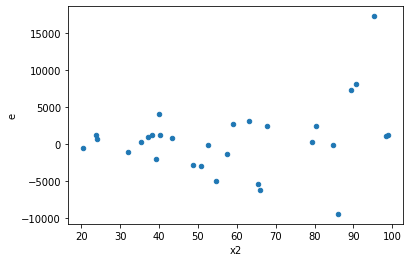

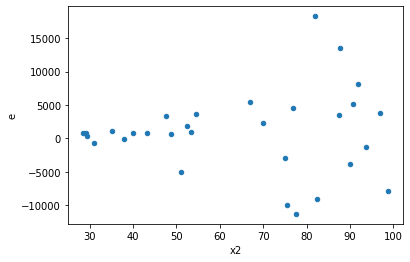

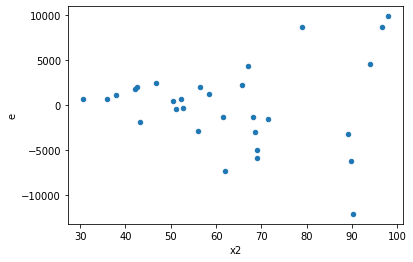

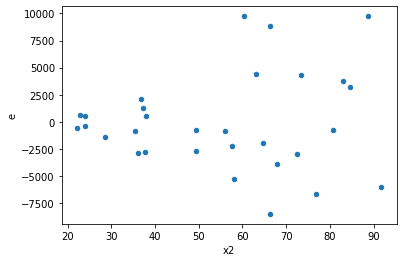

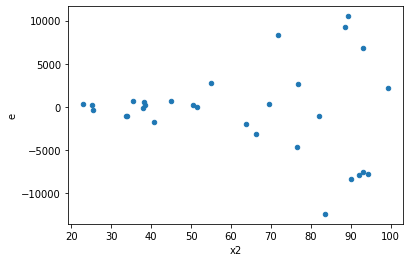

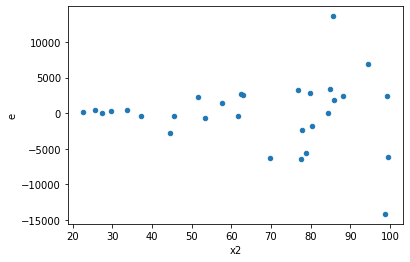

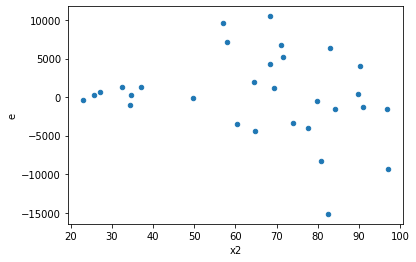

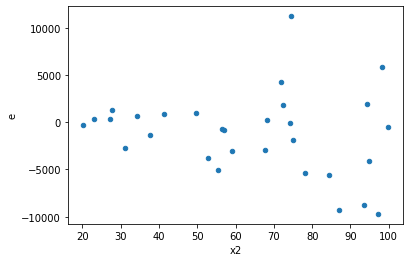

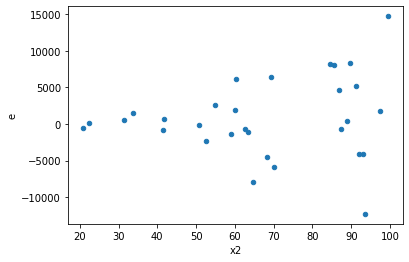

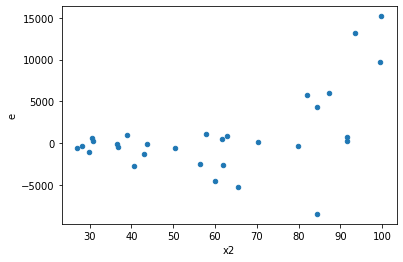

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,29003004.570191942,386540602.2125945,2900300.457019194,38654060.22125945,13.327605465051182,0.00032864124199782907,0.9998356793790011,0.00016432062099891453,Reject001=0 : Heteroscedasticity
1.0,10.0,10.0,40526584.116159104,902753132.5552648,4052658.4116159105,90275313.25552648,22.275579159786908,3.189073198228698e-05,0.9999840546340089,1.594536599114349e-05,Reject001=0 : Heteroscedasticity
2.0,10.0,10.0,21664666.628690735,394834196.52483034,2166466.6628690735,39483419.65248303,18.22479908377392,8.040135704412421e-05,0.9999597993214779,4.0200678522062105e-05,Reject001=0 : Heteroscedasticity
3.0,10.0,10.0,24204974.76741784,379801197.7297849,2420497.4767417843,37980119.77297849,15.691038779393104,0.0001585691269592182,0.9999207154365204,7.92845634796091e-05,Reject001=0 : Heteroscedasticity
4.0,10.0,10.0,6781704.317895182,511940498.76279354,678170.4317895182,51194049.876279354,75.48847233163994,9.212965346172552e-08,0.9999999539351733,4.606482673086276e-08,Reject001=0 : Heteroscedasticity
5.0,10.0,10.0,16764257.03574168,360169940.6595472,1676425.703574168,36016994.06595472,21.484396230125725,3.771353178594339e-05,0.999981143234107,1.8856765892971694e-05,Reject001=0 : Heteroscedasticity
6.0,10.0,10.0,118179897.70274362,359084919.46207786,11817989.770274362,35908491.946207784,3.0384602325962367,0.09419378366599851,0.9529031081670007,0.047096891832999255,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,34625604.08144599,421595548.4385544,3462560.4081445993,42159554.84385544,12.175832295860648,0.0004890494261007294,0.9997554752869496,0.0002445247130503647,Reject001=0 : Heteroscedasticity
8.0,10.0,10.0,45374110.47812283,569021304.9031801,4537411.047812283,56902130.490318015,12.540660277572478,0.0004297161398043592,0.9997851419300978,0.0002148580699021796,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,29003004.570191942,386540602.2125945,2900300.457019194,38654060.22125945,13.327605465051182,0.00032864124199782907,Reject001=0 : Heteroscedasticity
1.0,10.0,10.0,40526584.116159104,902753132.5552648,4052658.4116159105,90275313.25552648,22.275579159786908,3.189073198228698e-05,Reject001=0 : Heteroscedasticity
2.0,10.0,10.0,21664666.628690735,394834196.52483034,2166466.6628690735,39483419.65248303,18.22479908377392,8.040135704412421e-05,Reject001=0 : Heteroscedasticity
3.0,10.0,10.0,24204974.76741784,379801197.7297849,2420497.4767417843,37980119.77297849,15.691038779393104,0.0001585691269592182,Reject001=0 : Heteroscedasticity
4.0,10.0,10.0,6781704.317895182,511940498.76279354,678170.4317895182,51194049.876279354,75.48847233163994,9.212965346172552e-08,Reject001=0 : Heteroscedasticity
5.0,10.0,10.0,16764257.03574168,360169940.6595472,1676425.703574168,36016994.06595472,21.484396230125725,3.771353178594339e-05,Reject001=0 : Heteroscedasticity
6.0,10.0,10.0,118179897.70274362,359084919.46207786,11817989.770274362,35908491.946207784,3.0384602325962367,0.09419378366599851,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,34625604.08144599,421595548.4385544,3462560.4081445993,42159554.84385544,12.175832295860648,0.0004890494261007294,Reject001=0 : Heteroscedasticity
8.0,10.0,10.0,45374110.47812283,569021304.9031801,4537411.047812283,56902130.490318015,12.540660277572478,0.0004297161398043592,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    929
Reject001=1 : Homoscedasticity       71
Name: Result_test, dtype: int64